## Feature Scaling Data with Scikit-Learn for Machine Learning in Python

Preprocessing data is an often overlooked key step in Machine Learning. In fact - it's as important as the shiny model you want to fit with it.

    "Garbage in - garbage out."
    
You can have the best model crafted for any sort of problem - if you feed it garbage, it'll spew out garbage. It's worth noting that "garbage" doesn't refer to random data.

## What is Feature Scaling - Normalization and Standardization

Scaling or Feature Scaling is the process of changinng the scale of certain features to a common one. This is typically achieved through normalization and standardization (scaling techniques).

1. Normalization is the process of scaling data into a range of [0, 1]. It's more useful and common for regression tasks.

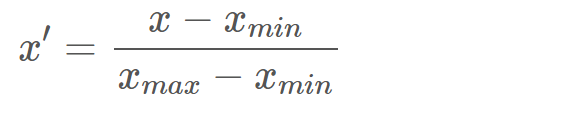

2. Standardization is the process of scaling data so that they have a mean value of 0 and a standard deviation of 1. It's more useful and common for classification tasks.

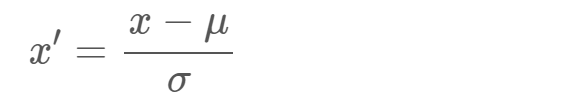

A normal distribution with these values is called a standard normal distribution.

To perform standardization, Scikit-Learn provides us with the StandardScaler class.

Normalization is also known as Min-Max Scaling and Scikit-Learn provides the MinMaxScaler for this purpose.

## When to Perform Feature Scaling?

>**Feature Scaling doesn't guarantee better model performance for all models.**

For instance, Feature Scaling doesn't do much if the scale doesn't matter. For K-Means Clustering, the Euclidean distance is important, so Feature Scaling makes a huge impact. It also makes a huge impact for any algorithms that rely on gradients, such as linear models that are fitted by minimizing loss with Gradient Descent.

Principal Component Analysis (PCA) also suffers from data that isn't scaled properly.

A tree-based model won't suffer from unscaled data, because scale doesn't affect them at all, but if you perform Gradient Boosting on Classifiers, the scale does affect learning.

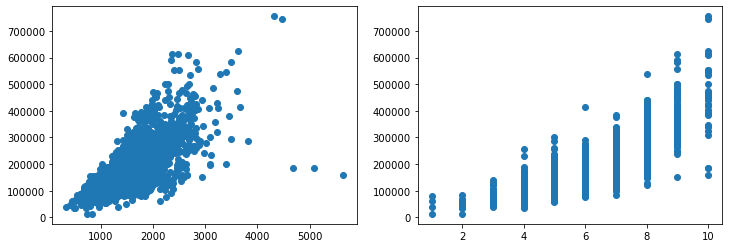

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Dataset
df = pd.read_csv('AmesHousing.csv')
# Single out a couple of predictor variables and labels ('SalePrice' is our target label set)
x = df[['Gr Liv Area', 'Overall Qual']].values
y = df['SalePrice'].values

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].scatter(x[:,0], y)
ax[1].scatter(x[:,1], y)

plt.show()

There's a clear strong positive correlation between the "Gr Liv Area" feature and the "SalePrice" feature - with only a couple of outliers. There's also a strong positive correlation between the "Overall Qual" feature and the "SalePrice".

Though these are on a much different scale - the "Gr Liv Area" spans up to ~5000 (measured in square feet), while the "Overall Qual" feature spans up to 10 (discrete categories of quality). If we were to plot these two on the same axes, we wouldn't be able to tell much about the "Overall Qual" feature:

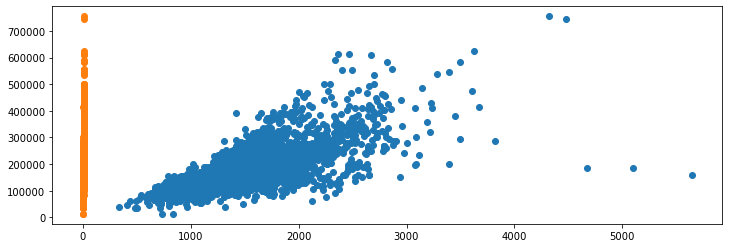

In [2]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

Additionally, if we were to plot their distributions, we wouldn't have much luck either:

(array([  4.,  13.,  40., 226., 825., 732., 602., 350., 107.,  31.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

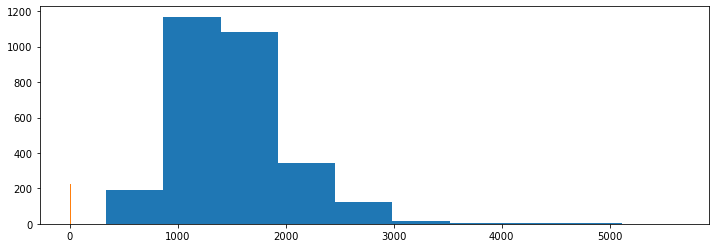

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(x[:,0])
ax.hist(x[:,1])

### The scale of these features is so different that we can't really make much out by plotting them together. This is where feature scaling kicks in.

# StandardScaler

The StandardScaler class is used to transform the data by standardizing it. Let's import it and scale the data via its fit_transform() method:

(array([  4.,  13.,  40., 226., 825., 732., 602., 350., 107.,  31.]),
 array([-3.61137917, -2.97343659, -2.335494  , -1.69755142, -1.05960884,
        -0.42166626,  0.21627632,  0.85421891,  1.49216149,  2.13010407,
         2.76804665]),
 <BarContainer object of 10 artists>)

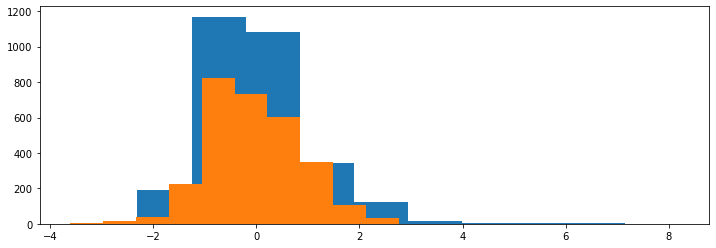

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(x)

fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(X_std[:,0])
ax.hist(X_std[:,1])

If we were to plot these through Scatter Plots yet again, we'd perhaps more clearly see the effects of the standarization:

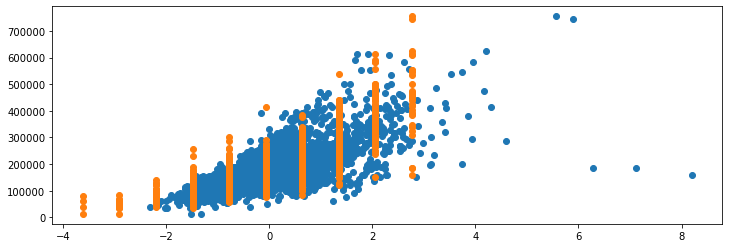

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.scatter(x_std[:,0], y)
ax.scatter(x_std[:,1], y)

# MinMaxScaler

To normalize features, we use the MinMaxScaler class. It works in much the same way as StandardScaler, but uses a fundementally different approach to scaling the data:

(array([  4.,  13.,  40., 226., 825., 732., 602., 350., 107.,  31.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

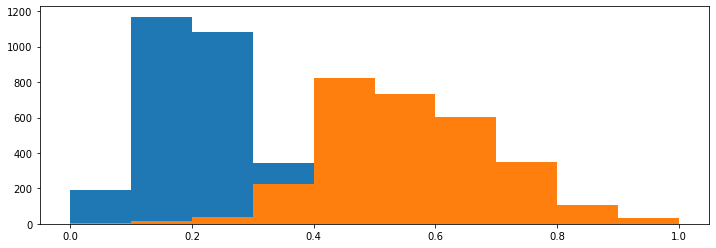

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(X_scaled [:,0])
ax.hist(X_scaled [:,1])

They are normalized in the range of [0, 1].

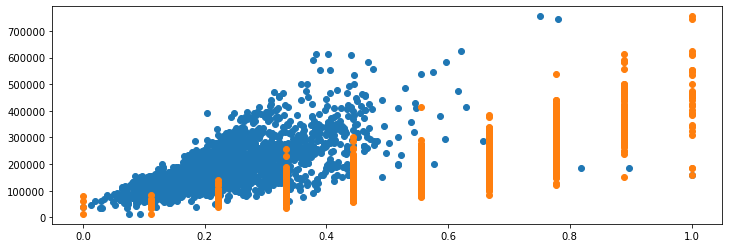

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(X_scaled [:,0], y)
ax.scatter(X_scaled [:,1], y)